
<div style="color: white;
            display: fill;
            border-radius: 5px;
            background-color: blue;
            font-size: 200%;
            font-family: cursive;
            text-align: center">
EDA (RTC Severity)
</div><p><a id="top"></a>
EDA Lists:</p>
<ul>
<li><a href="#1st_road">1st_Road_Class and 1st_Road_Number</a></li>
<li><a href="#2nd_road">2nd_Road_Class and 2nd_Road_Number</a></li>
<li><a href="#carriageway_hazards">Carriageway_Hazards</a></li>
<li><a href="#date">Date</a></li>
<li><a href="#accident_severity">Accident_Severity</a></li>
<li><a href="#day_of_week">Day_of_Week</a></li>
</ul>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns", None)
plt.style.use("default")

In [3]:
CBLUEBG = "\33[44m"
CEND = "\33[0m"

In [5]:
df_accident = pd.read_parquet("../DATA/parquet/accident_data.parquet")
df_accident.shape

(1048575, 34)

In [6]:
df_accident.tail(3)

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
1048572,201091NM01935,A,96.0,Unclassified,0.0,Slight,None,23/02/2010,Tuesday,1.0,Give way or uncontrolled,T or staggered junction,57.585044,Daylight,Highland,Highland,288730.0,856520.0,-3.862727,None,1,3,0.0,0.0,Northern,Frost or ice,Single carriageway,None,30,09:38,Rural,Fine no high winds,2010,Yes
1048573,201091NM01964,A,9.0,Unclassified,0.0,Serious,None,23/02/2010,Tuesday,1.0,Give way or uncontrolled,T or staggered junction,57.214898,Darkness - no lighting,Highland,Highland,289940.0,815260.0,-3.823997,None,1,2,0.0,0.0,Northern,Wet or damp,Single carriageway,None,60,18:25,Rural,Fine no high winds,2010,Yes
1048574,201091NM02142,None,0.0,Unclassified,0.0,Serious,Other object on road,28/02/2010,Sunday,1.0,Give way or uncontrolled,T or staggered junction,57.575210,Daylight,Highland,Highland,286730.0,855480.0,-3.895673,None,1,1,0.0,0.0,Northern,Wet or damp,Dual carriageway,None,60,15:45,Rural,Snowing no high winds,2010,Yes


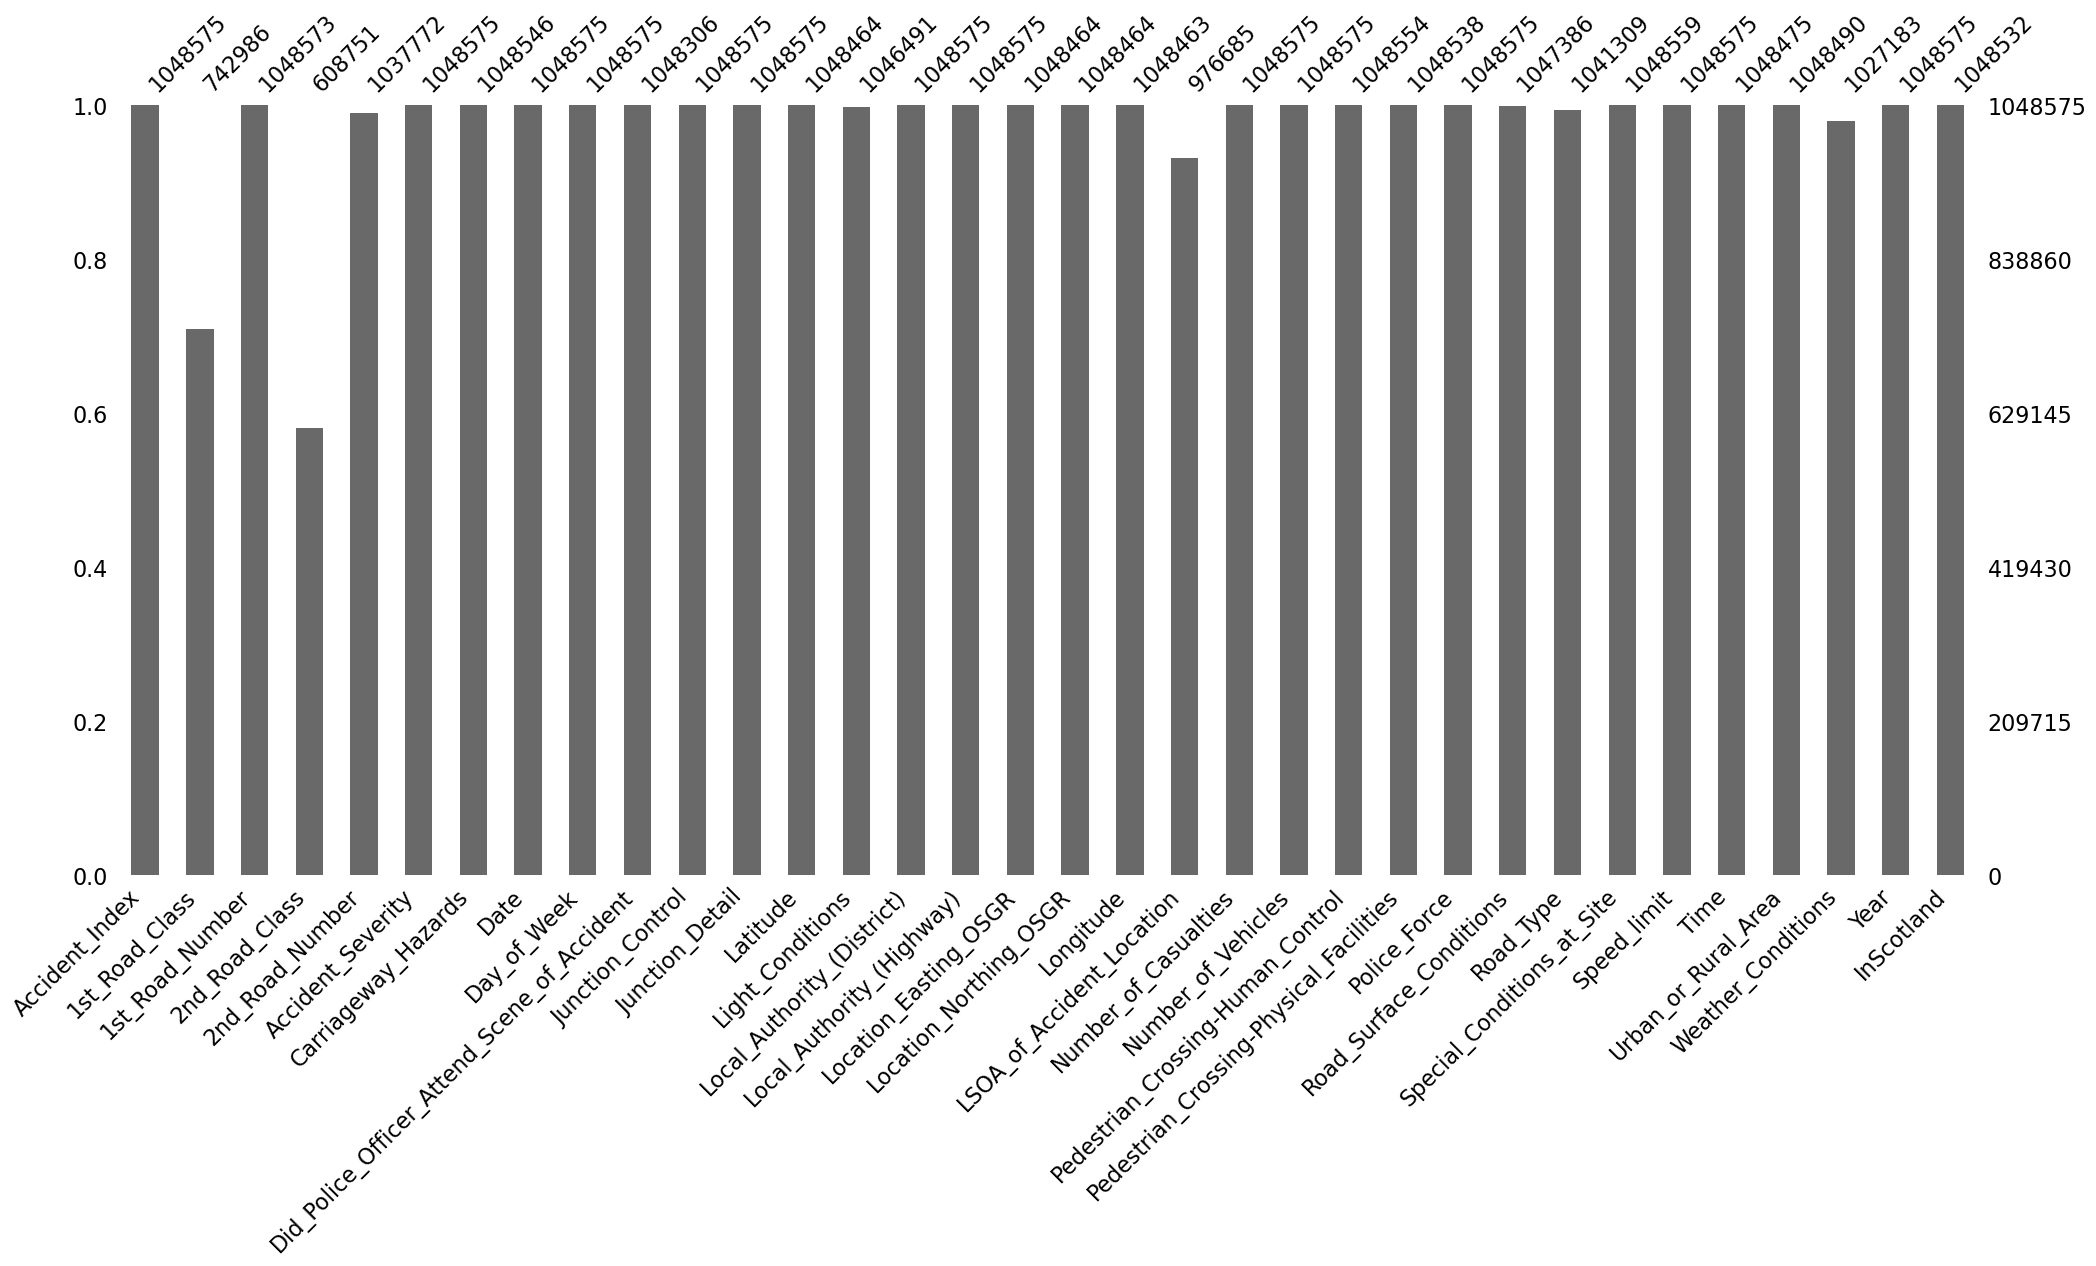

In [8]:
msno.bar(df_accident);


<p><a href="#top">START</a>
<a id="1st_road"></a></p>
<div style="color: black; 
            display: fill; 
            border-radius: 5px;
            background-color: yellow;
            font-size: 150%;
            font-family: cursive;
            text-align: left">
[Feature: 1st_Road_Class and 1st_Road_Number]
</div>


In [9]:
print(f"Unique Values in {CBLUEBG} 1st_Road_Class {CEND}: {df_accident['1st_Road_Class'].nunique()}, \n{df_accident['1st_Road_Class'].unique()}")

Unique Values in  1st_Road_Class : 5, 
['A' 'B' 'C' None 'Motorway' 'A(M)']


In [10]:
#utility function
def plot_road_class(data, ax, title):
    sns.histplot(x=data, bins=50, ax=ax).set(title=f"Road Class - {title}");

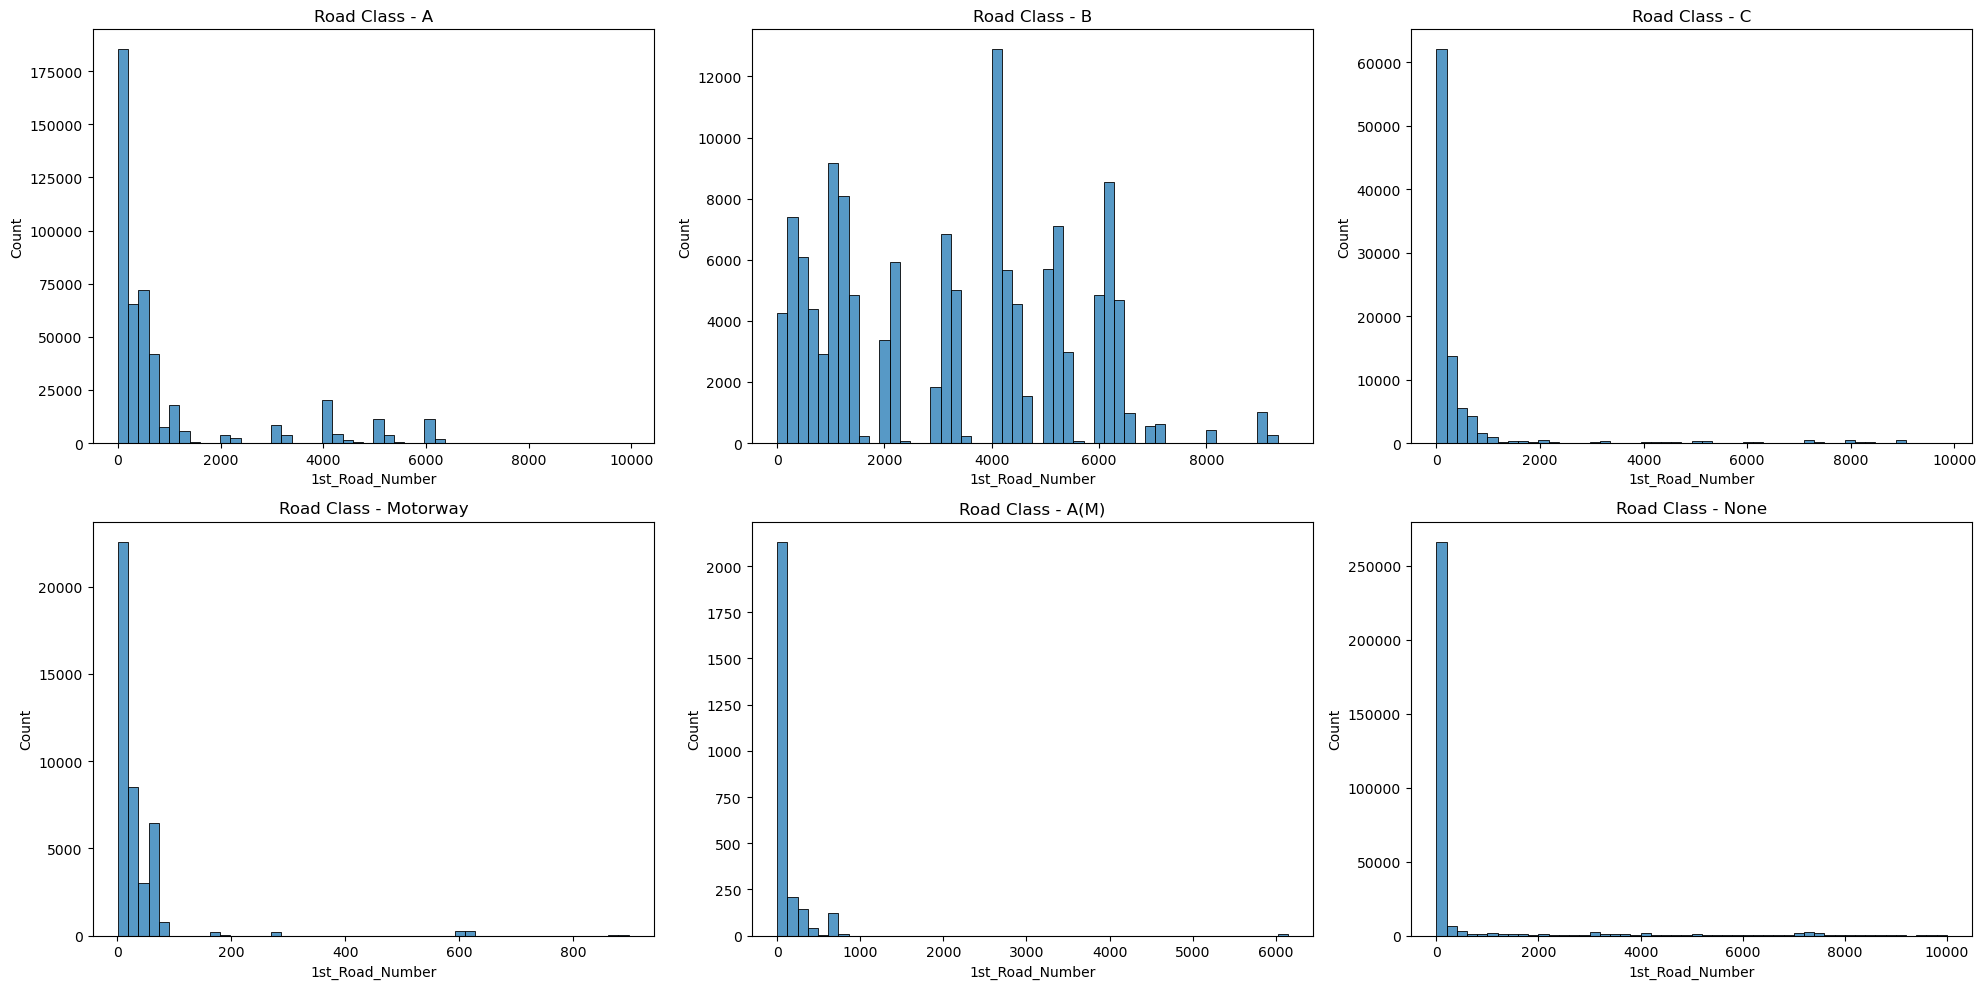

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
ax = ax.flatten()

plot_road_class(df_accident[df_accident["1st_Road_Class"] == "A"]["1st_Road_Number"], ax[0], "A")
plot_road_class(df_accident[df_accident["1st_Road_Class"] == "B"]["1st_Road_Number"], ax[1], "B")
plot_road_class(df_accident[df_accident["1st_Road_Class"] == "C"]["1st_Road_Number"], ax[2], "C")
plot_road_class(df_accident[df_accident["1st_Road_Class"] == "Motorway"]["1st_Road_Number"], ax[3], "Motorway")
plot_road_class(df_accident[df_accident["1st_Road_Class"] == "A(M)"]["1st_Road_Number"], ax[4], "A(M)")
plot_road_class(df_accident[df_accident["1st_Road_Class"].isna()]["1st_Road_Number"], ax[5], "None")

plt.tight_layout()


<div style="border-radius: 5px;
            font-size: 120%;
            text-decoration: underline;
            font-family: cursive;
            text-align: left">
Observations:
</div><ul>
<li>Most values are 0 for all classes (A, B, C, Motorway, A(M), None)</li>
<li>In real-world situations, it's not possible the road numbers are 0 for all classes</li>
<li>This <code>1st_Road_Number</code> feature should be dropped as the inputs may be wrong</li>
</ul>



<p><a href="#top">START</a>
<a id="2nd_road"></a></p>
<div style="color: black; 
            display: fill; 
            border-radius: 5px;
            background-color: yellow;
            font-size: 150%;
            font-family: cursive;
            text-align: left">
Feature: 2nd_Road_Class and 2nd_Road_Number
</div>


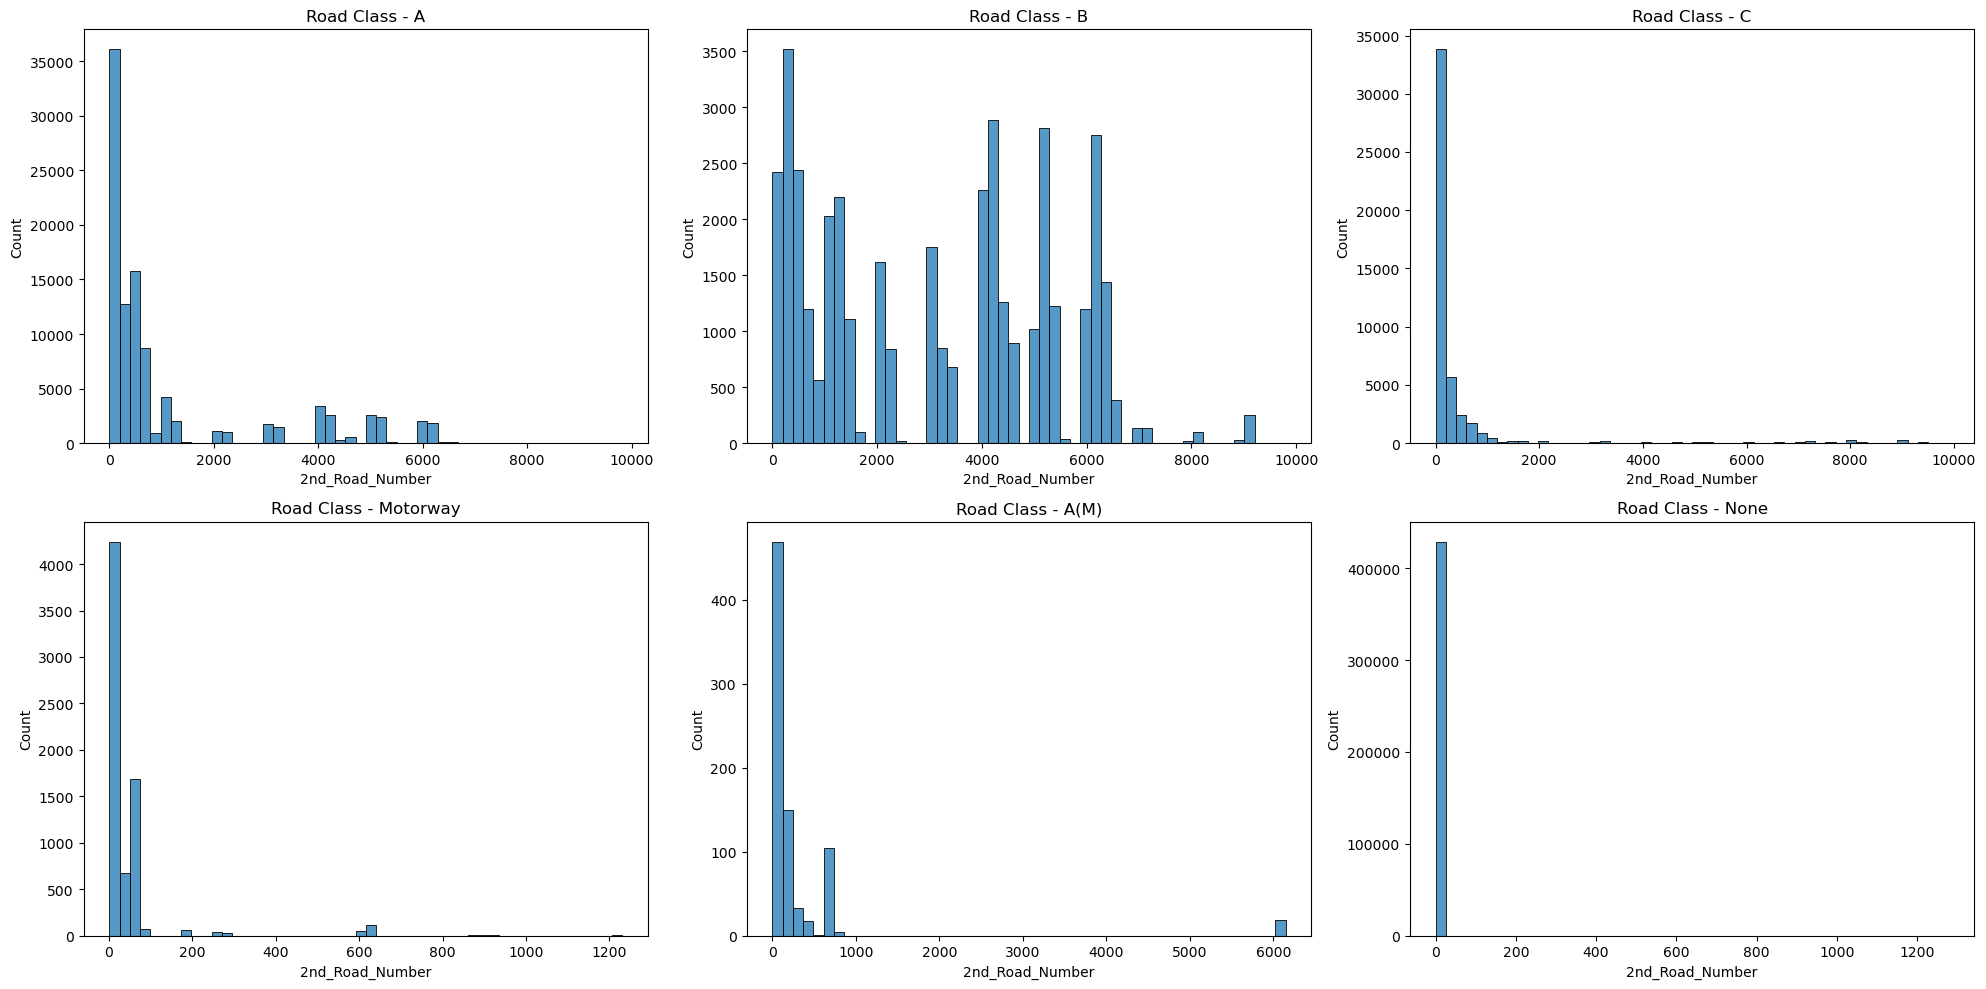

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
ax = ax.flatten()

plot_road_class(df_accident[df_accident["2nd_Road_Class"] == "A"]["2nd_Road_Number"], ax[0], "A")
plot_road_class(df_accident[df_accident["2nd_Road_Class"] == "B"]["2nd_Road_Number"], ax[1], "B")
plot_road_class(df_accident[df_accident["2nd_Road_Class"] == "C"]["2nd_Road_Number"], ax[2], "C")
plot_road_class(df_accident[df_accident["2nd_Road_Class"] == "Motorway"]["2nd_Road_Number"], ax[3], "Motorway")
plot_road_class(df_accident[df_accident["2nd_Road_Class"] == "A(M)"]["2nd_Road_Number"], ax[4], "A(M)")
plot_road_class(df_accident[df_accident["2nd_Road_Class"].isna()]["2nd_Road_Number"], ax[5], "None")

plt.tight_layout()

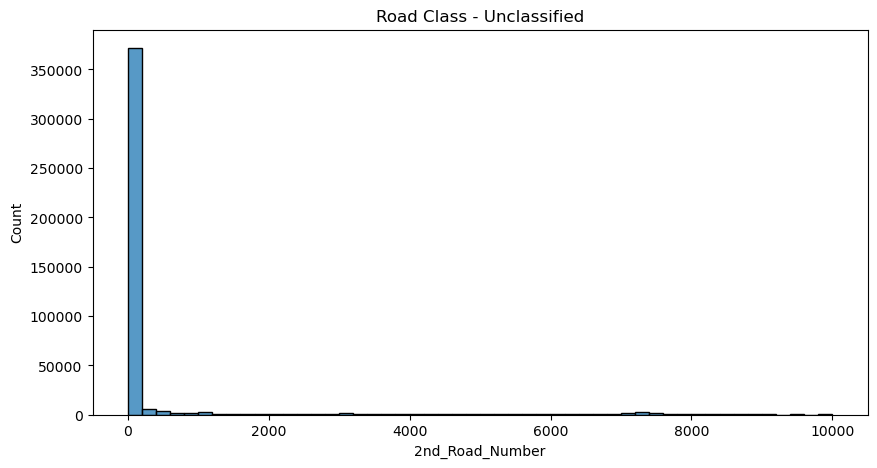

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

plot_road_class(df_accident[df_accident["2nd_Road_Class"] == "Unclassified"]["2nd_Road_Number"], ax, "Unclassified")


<div style="border-radius: 5px;
            font-size: 120%;
            text-decoration: underline;
            font-family: cursive;
            text-align: left">
Observations:
</div><ul>
<li>Most values are 0 for all classes (A, B, C, Motorway, A(M), None, Unclassified)</li>
<li>In real-world situations, it's not possible the road numbers are 0 for all classes</li>
<li>This <code>2nd_Road_Number</code> feature should be dropped as the inputs may be wrong</li>
</ul>


In [14]:
df_accident[["1st_Road_Number", "2nd_Road_Number"]].describe().T

,count,mean,std,min,25%,50%,75%,max
1st_Road_Number,1048573.0,1011.997007,1832.041637,0.0,0.0,125.0,706.0,9999.0
2nd_Road_Number,1037772.0,387.000433,1316.672921,0.0,0.0,0.0,0.0,9999.0



<p><a href="#top">START</a>
<a id="carriageway_hazards"></a></p>
<div style="color: black; 
            display: fill; 
            border-radius: 5px;
            background-color: yellow;
            font-size: 150%;
            font-family: cursive;
            text-align: left">
Feature: Carriageway_Hazards
</div>


In [15]:
print(f"Unique Values in {CBLUEBG} Carriageway_Hazards {CEND}: {df_accident['Carriageway_Hazards'].nunique()}, \n{df_accident['Carriageway_Hazards'].unique()}")

Unique Values in  Carriageway_Hazards : 6, 
['None' 'Other object on road' 'Pedestrian in carriageway - not injured'
 'Vehicle load on road' 'Previous accident'
 'Any animal in carriageway (except ridden horse)' None]


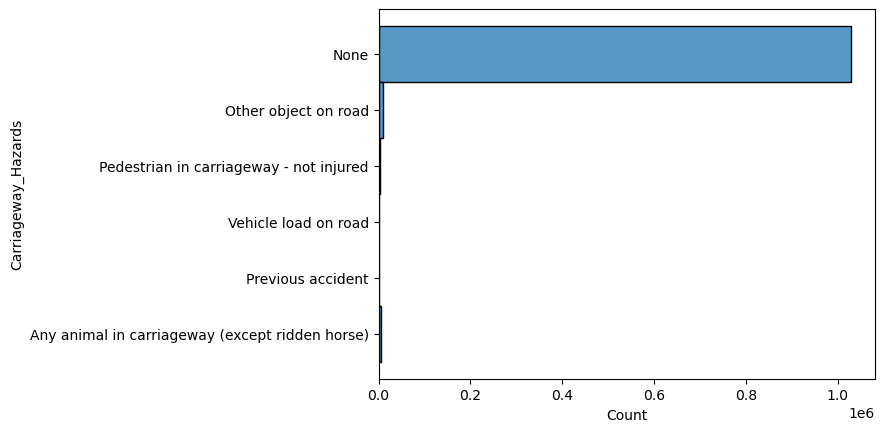

In [16]:
sns.histplot(y=df_accident["Carriageway_Hazards"], bins=50);


<h4 id="Checking-if-the-values-are-None-or-missing">Checking if the values are <code>None</code> or missing<a class="anchor-link" href="#Checking-if-the-values-are-None-or-missing">¶</a></h4>


In [17]:
print(f"{CBLUEBG}Missing values{CEND}: {df_accident['Carriageway_Hazards'].isna().sum()}")

Missing values: 29


In [18]:
df_accident[df_accident["Carriageway_Hazards"] == "None"].head(3)

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,None,0.0,Serious,None,04/01/2005,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.489096,None,Kensington and Chelsea,Kensington and Chelsea,525680.0,178240.0,-0.191170,E01002849,1,1,0.0,1.0,Metropolitan Police,Wet or damp,Single carriageway,None,30,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,05/01/2005,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524170.0,181650.0,-0.211708,E01002909,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,None,30,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,None,0.0,Slight,None,06/01/2005,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524520.0,182240.0,-0.206458,E01002857,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,00:15,Urban,Fine no high winds,2005,No


In [19]:
df_accident[df_accident["Carriageway_Hazards"].isna()].head(3)

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
11984,200501MM79111,B,219.0,Unclassified,0.0,Slight,None,17/12/2005,Saturday,3.0,Give way or uncontrolled,T or staggered junction,51.449266,Darkness - lights lit,Southwark,Southwark,533990.0,174020.0,-0.073146,E01003958,1,2,0.0,0.0,Metropolitan Police,None,Single carriageway,None,30,01:00,Urban,None,2005,No
25234,200501YR99065,None,0.0,None,0.0,Slight,None,12/12/2005,Monday,3.0,Data missing or out of range,Not at junction or within 20 metres,51.595956,Darkness - lights lit,Haringey,Haringey,529240.0,190220.0,-0.135526,E01001966,2,2,0.0,0.0,Metropolitan Police,None,Single carriageway,None,30,19:00,Urban,None,2005,No
26704,200501ZT80452,A,237.0,None,0.0,Slight,None,14/10/2005,Friday,3.0,Data missing or out of range,Not at junction or within 20 metres,51.378278,Darkness - lights lit,Sutton,Sutton,528510.0,165980.0,-0.154876,E01004188,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,02:45,Urban,Fine no high winds,2005,No



<div style="border-radius: 5px;
            font-size: 120%;
            text-decoration: underline;
            font-family: cursive;
            text-align: left">
Observations:
</div><ul>
<li>Most values are <code>None</code> which means most of the time there were no carriageway hazards on the road</li>
<li>Both missing values and <code>None</code> labelled values are interpreted by pandas as <code>None</code> values.</li>
</ul>



<p><a href="#top">START</a>
<a id="date"></a></p>
<div style="color: black; 
            display: fill; 
            border-radius: 5px;
            background-color: yellow;
            font-size: 150%;
            font-family: cursive;
            text-align: left">
Feature: Date
</div>


In [20]:
print(f"Data type of Date Column: {df_accident['Date'].dtype}")

Data type of Date Column: object


In [21]:
df_accident["Date"][:7]

0    04/01/2005
1    05/01/2005
2    06/01/2005
3    07/01/2005
4    10/01/2005
5    11/01/2005
6    13/01/2005
Name: Date, dtype: object


<h3 id="Task-3.1:">Task-3.1:<a class="anchor-link" href="#Task-3.1:">¶</a></h3><p>Converting <code>Date</code> column from Object to Datetime</p>


In [22]:
df_accident["Date"] =  pd.to_datetime(df_accident["Date"], format="%d/%m/%Y")
print(f"Data type of Date Column: {df_accident['Date'].dtype}")

Data type of Date Column: datetime64[ns]


In [23]:
df_accident.shape

(1048575, 34)


<h3 id="Task-3.2:">Task-3.2:<a class="anchor-link" href="#Task-3.2:">¶</a></h3><p>Adding extra 2 features to the dataset (Day and Month)</p>


In [24]:
df_accident["Day"] = df_accident["Date"].apply(lambda x:x.day)
df_accident["Month"] = df_accident["Date"].apply(lambda x:x.month)
df_accident.shape

(1048575, 36)


<h3 id="Graph-3.1">Graph-3.1<a class="anchor-link" href="#Graph-3.1">¶</a></h3><p><code>Day</code> with <code>Accident_Severity</code></p>


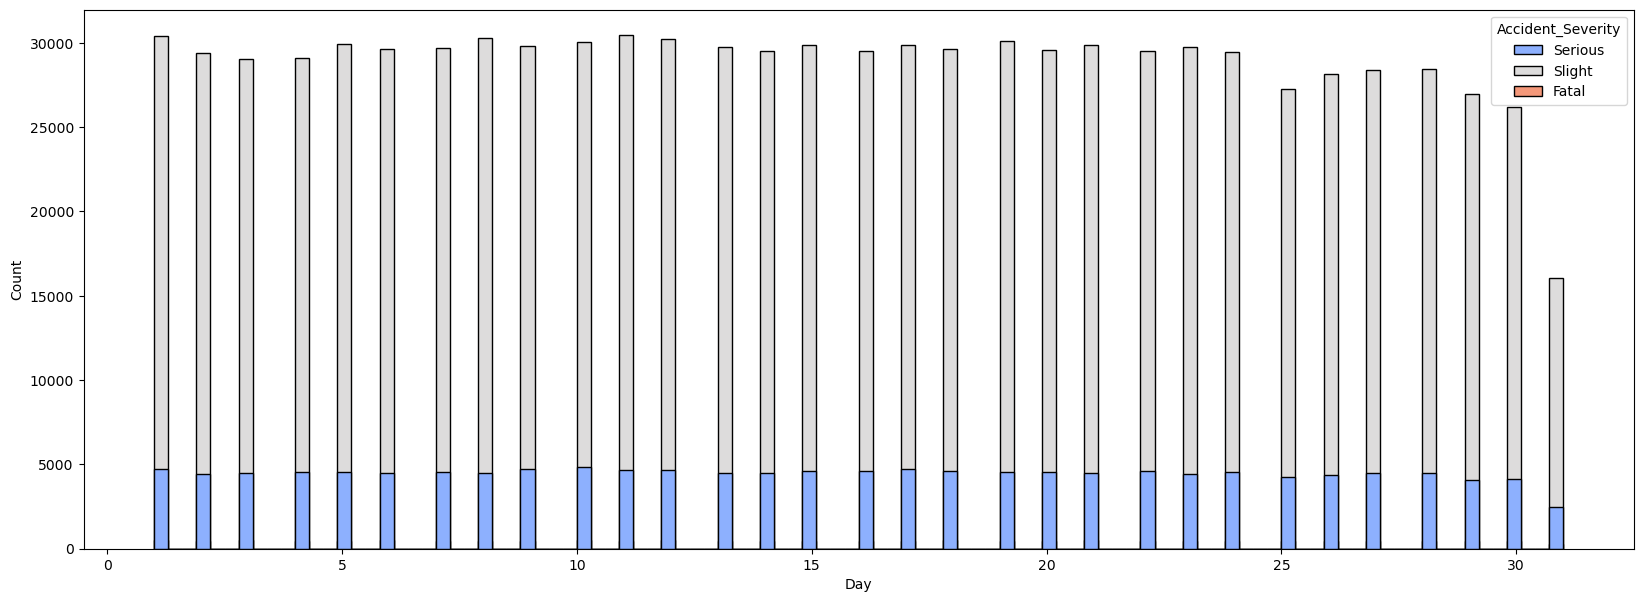

In [25]:
plt.figure(figsize=(20, 7))
sns.histplot(df_accident, x="Day", hue="Accident_Severity", palette="coolwarm", alpha=1.0, bins=100);


<p><strong>Observation:</strong> <code>Fatal</code> data is too less to be seen in the graph</p>
<h4 id="Graph-3.1.1">Graph-3.1.1<a class="anchor-link" href="#Graph-3.1.1">¶</a></h4><p>Different graph for <code>Fatal</code> case</p>


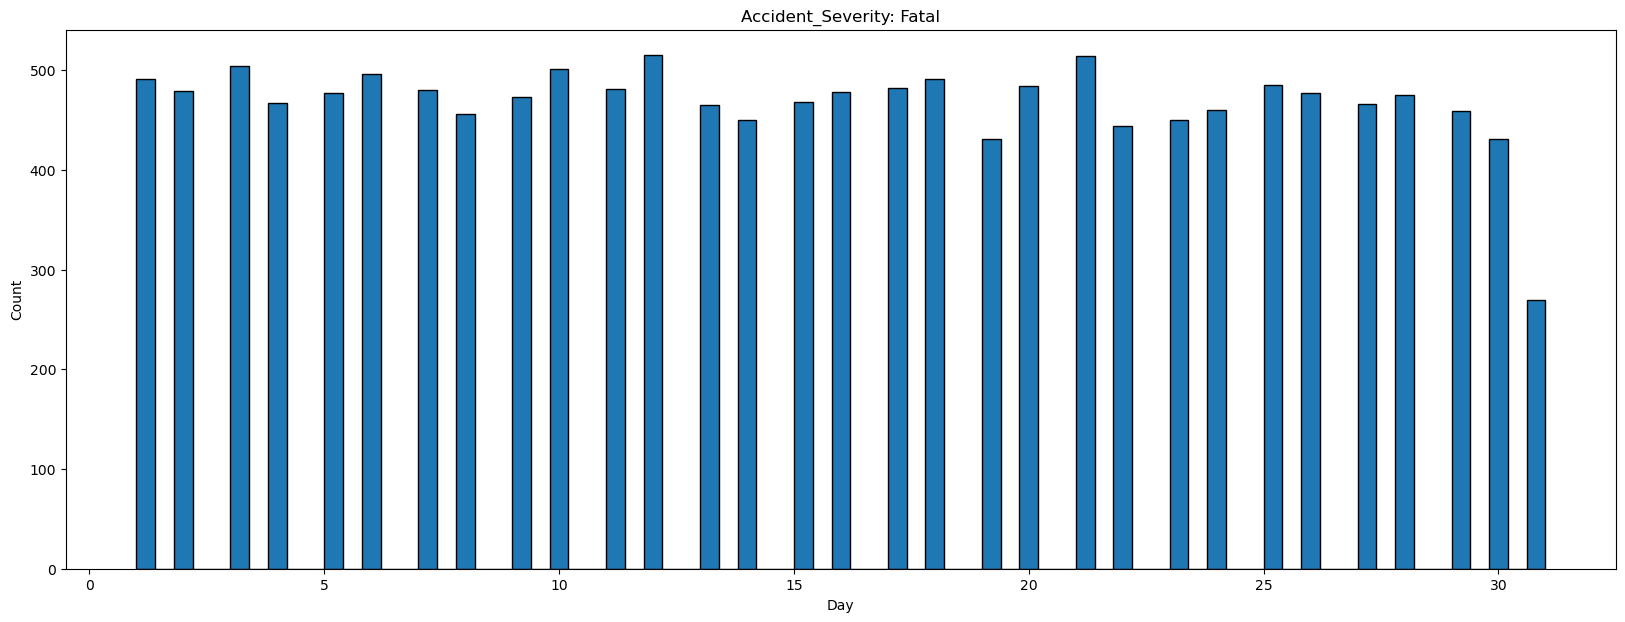

In [26]:
plt.figure(figsize=(20, 7))
sns.histplot(df_accident[df_accident["Accident_Severity"] == "Fatal"], 
             x="Day", palette="coolwarm", alpha=1.0, bins=75).set(title=f"Accident_Severity: Fatal");


<h3 id="Graph-3.2">Graph-3.2<a class="anchor-link" href="#Graph-3.2">¶</a></h3><p><code>Month</code> with <code>Accident_Severity</code></p>


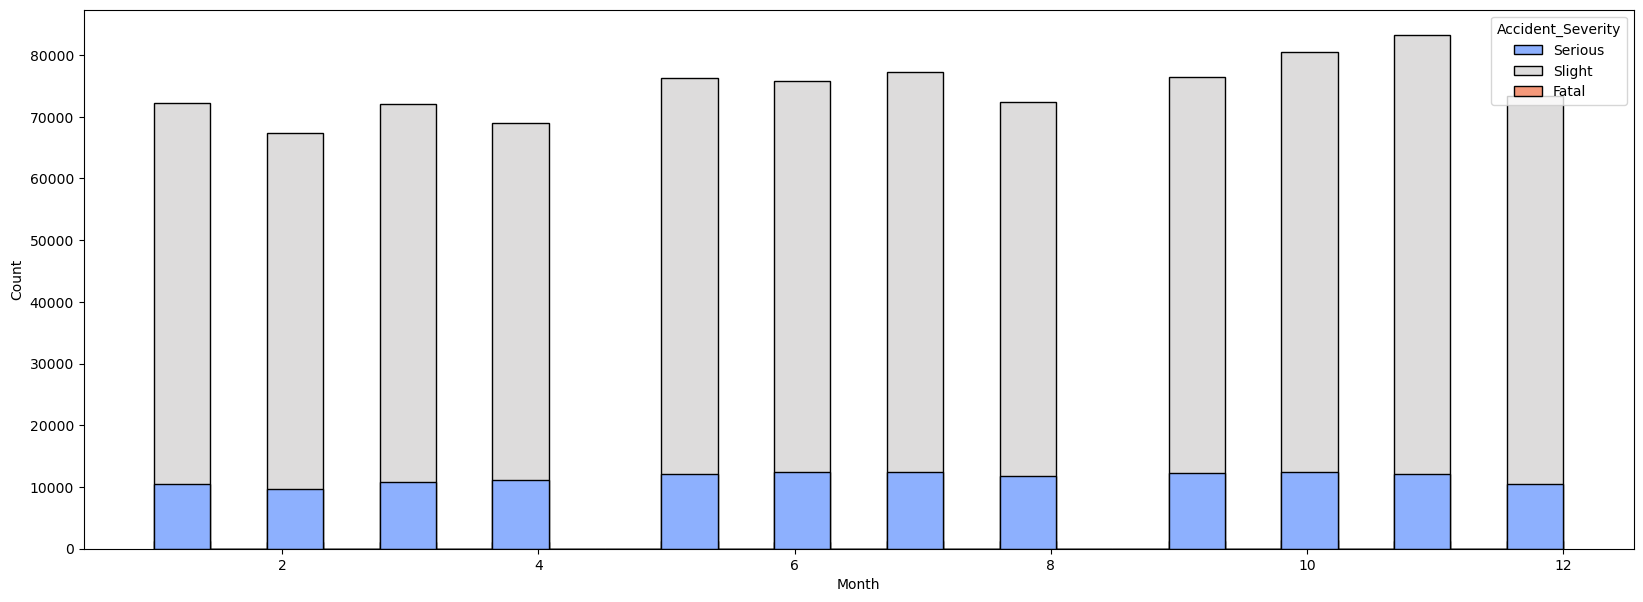

In [27]:
plt.figure(figsize=(20, 7))
sns.histplot(df_accident, x="Month", hue="Accident_Severity", palette="coolwarm", alpha=1.0, bins=25);


<p><strong>Observation:</strong> <code>Fatal</code> data is too less to be seen in the graph</p>
<h4 id="Graph-3.2.1">Graph-3.2.1<a class="anchor-link" href="#Graph-3.2.1">¶</a></h4><p>Different graph for <code>Fatal</code> case</p>


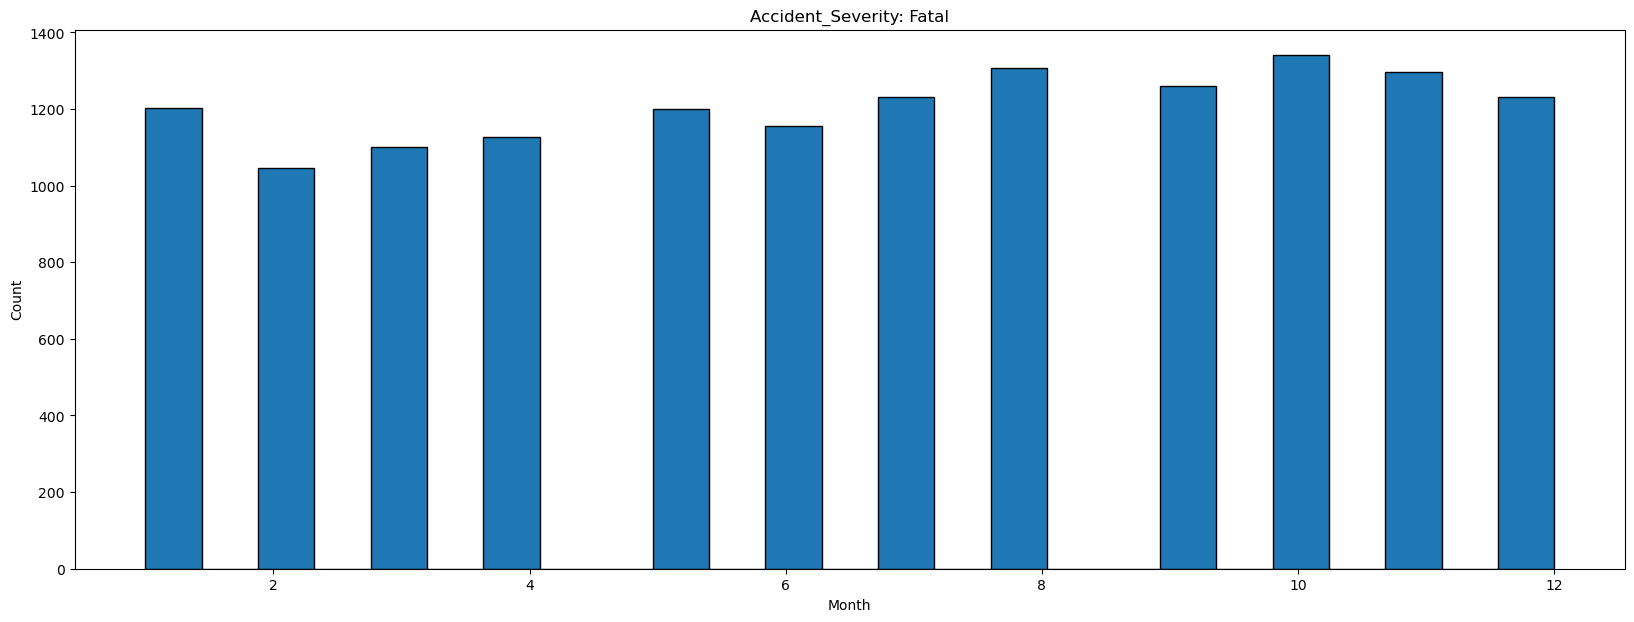

In [28]:
plt.figure(figsize=(20, 7))
sns.histplot(df_accident[df_accident["Accident_Severity"] == "Fatal"], 
             x="Month", palette="coolwarm", alpha=1.0, bins=25).set(title=f"Accident_Severity: Fatal");


<p><a href="#top">START</a>
<a id="accident_severity"></a></p>
<div style="color: black; 
            display: fill; 
            border-radius: 5px;
            background-color: yellow;
            font-size: 150%;
            font-family: cursive;
            text-align: left">
Feature: Accident_Severity
</div>


In [29]:
df_accident["Accident_Severity"].value_counts()

Slight     895883
Serious    138192
Fatal       14500
Name: Accident_Severity, dtype: int64

In [30]:
#percentage calculation
df_accident["Accident_Severity"].value_counts()/len(df_accident)*100

Slight     85.438142
Serious    13.179029
Fatal       1.382829
Name: Accident_Severity, dtype: float64

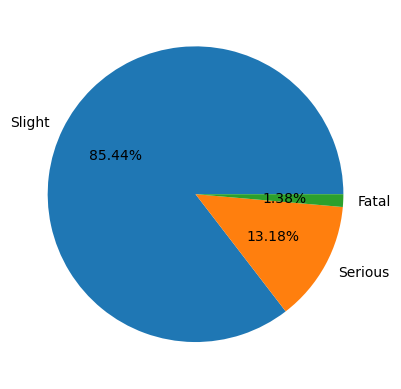

In [31]:
labels = ["Slight", "Serious", "Fatal"]
plt.pie(df_accident["Accident_Severity"].value_counts(), labels = labels, autopct="%.2f%%");


<div style="border-radius: 5px;
            font-size: 120%;
            text-decoration: underline;
            font-family: cursive;
            text-align: left">
Observations:
</div><ul>
<li><code>Fatal</code> case data is only 1.38%. So the model will be biased for <code>Slight</code> cases.</li>
</ul>



<p><a href="#top">START</a>
<a id="day_of_week"></a></p>
<div style="color: black; 
            display: fill; 
            border-radius: 5px;
            background-color: yellow;
            font-size: 150%;
            font-family: cursive;
            text-align: left">
Feature: Day_of_Week
</div>


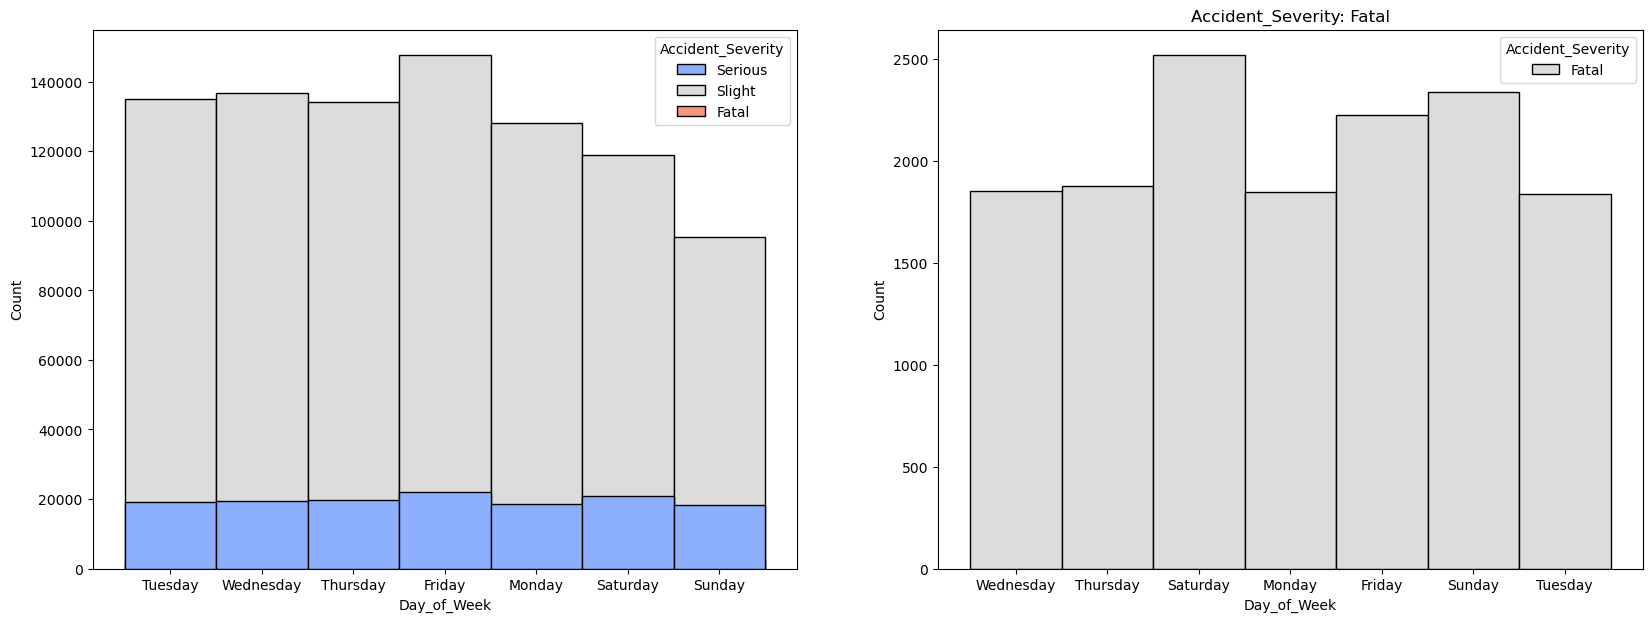

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
sns.histplot(df_accident, x="Day_of_Week", hue="Accident_Severity", palette="coolwarm", alpha=1.0, bins=50, ax=ax[0])
sns.histplot(df_accident[df_accident["Accident_Severity"] == "Fatal"], 
             x="Day_of_Week", hue="Accident_Severity", palette="coolwarm", alpha=1.0, bins=50, ax=ax[1]).set(title=f"Accident_Severity: Fatal")


<div style="border-radius: 5px;
            font-size: 120%;
            text-decoration: underline;
            font-family: cursive;
            text-align: left">
Observations:
</div><ul>
<li>Weekends (Saturday and Sunday) have most fatal accidents</li>
</ul>
